In [ ]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd # data processing

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/tested.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

df = pd.read_csv('/content/tested.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S
395,1287,1,1,"Smith, Mrs. Lucien Philip (Mary Eloise Hughes)",female,18.0,1,0,13695,60.0000,C31,S
214,1106,1,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S
118,1010,0,1,"Beattie, Mr. Thomson",male,36.0,0,0,13050,75.2417,C6,C
54,946,0,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C


In [ ]:
print(df.shape)
df = df.dropna()

sex = df['Sex'].value_counts()
age = df['Age'].value_counts()

df['is_male'] = [1 if typ == 'male' else 0 for typ in df['Sex']]
df.drop('Sex', axis=1, inplace=True)

df['is_young'] = [1 if quality >= 35 else 0 for quality in df['Age']]
df.drop('Age', axis=1, inplace=True)

df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)


X = df.drop('is_young', axis=1)
y = df['is_young']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3, random_state=42
)



X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[:3])


tf.random.set_seed(42)




model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])




model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

(87, 8)


KeyError: ignored

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100) #100
print(history)

Epoch 1/100
2/2 [==============================] - 1s 21ms/step - loss: 0.6826 - accuracy: 0.5500 - precision: 0.7586 - recall: 0.5238
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 0.6145 - accuracy: 0.7167 - precision: 0.7119 - recall: 1.0000
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 0.5705 - accuracy: 0.7500 - precision: 0.7368 - recall: 1.0000
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 0.5511 - accuracy: 0.7667 - precision: 0.7500 - recall: 1.0000
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 0.5271 - accuracy: 0.7667 - precision: 0.7500 - recall: 1.0000
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 0.5102 - accuracy: 0.7500 - precision: 0.7455 - recall: 0.9762
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 0.4907 - accuracy: 0.7500 - precision: 0.7455 - recall: 0.9762
Epoch 8/100
2/2 [==============================] - 0s 1

Plotting accuracy versus epoch
accuracy is about:
1.0


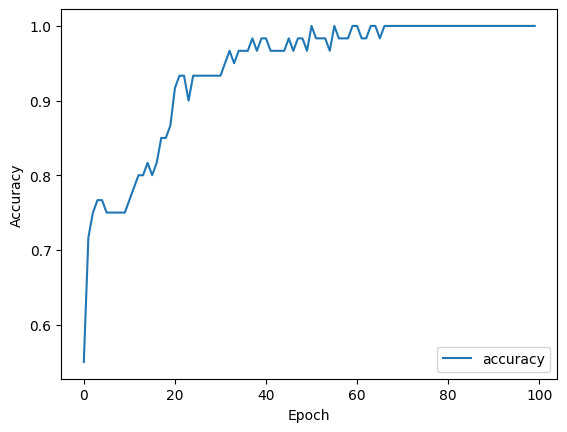

In [ ]:
print("Plotting accuracy versus epoch")
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
print("accuracy is about:")
print(np.max(history.history['accuracy']))

Hurrah its done and accuracy is about 1.0